In [1]:
import tensorflow as tf 
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_v2_pcl/all_X_ptbxl.pcl", "rb"))
# y = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_v2_pcl/all_y_ptbxl.pcl", "rb"))

# X = pickle.load(open("/Users/macbookpro/Documents/ptb_xl/scp_filter_v2/all_X_ptbxl.pcl", "rb"))
# y= pickle.load(open("/Users/macbookpro/Documents/ptb_xl/scp_filter_v2/all_y_ptbxl.pcl", "rb"))

X = pickle.load(open("/scratch/thurasx/ptb_xl/scp_filter_v2/all_X_ptbxl.pcl", "rb"))
y= pickle.load(open("/scratch/thurasx/ptb_xl/scp_filter_v2/all_y_ptbxl.pcl", "rb"))


In [3]:
print(X.shape, y.shape)
unq, cnt = np.unique(y, return_counts=True)
print(unq, cnt)

(21837, 1000, 12) (21837,)
[0 1 2 3 4] [9495 4140 5250 2547  405]


In [5]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X[:,:,1], y, random_state=1)
layer = tf.keras.layers.CategoryEncoding(num_tokens=5, output_mode="one_hot")
y_train = layer(y_train.astype(np.int32))
print("Before ",X_train.shape, X_test.shape)
X_train = X_train.reshape(-1,1000,1)
X_test = X_test.reshape(-1,1000,1)
print("After ",X_train.shape, X_test.shape)

Before  (16377, 1000) (5460, 1000)
After  (16377, 1000, 1) (5460, 1000, 1)


In [7]:
#data generation (later)
unq, cnt = np.unique(y_train, return_counts=True)
print(unq, cnt)

[0. 1.] [65508 16377]


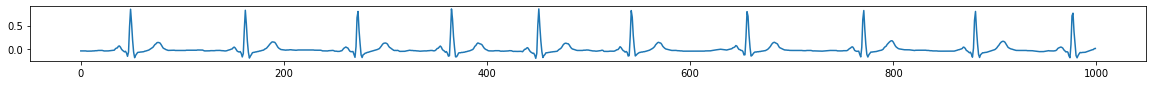

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)


In [6]:
plt.figure(figsize=(20,1))
plt.plot(X_train[0])
plt.show()
print(y_train[0])

In [30]:
#define model
model = Sequential()
model.add(Conv2D(64, (100,1), input_shape=(1000,1,1)))
model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(5,1)))

model.add(Conv2D(64, (75,1)))
model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(4,1)))

model.add(Conv2D(128, (50,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,1)))

model.add(Flatten())
model.add(Dense(10))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 901, 1, 64)        6464      
                                                                 
 activation_40 (Activation)  (None, 901, 1, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 827, 1, 64)        307264    
                                                                 
 activation_41 (Activation)  (None, 827, 1, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 778, 1, 128)       409728    
                                                                 
 activation_42 (Activation)  (None, 778, 1, 128)       0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 389, 1, 128)    

In [29]:
epoch = 100
validation_step = 100
batch_size = 100
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, validation_steps=validation_step, verbose=1)

Epoch 1/50
162/410 [==========>...................] - ETA: 40s - loss: 1.2788 - accuracy: 0.4824

KeyboardInterrupt: 

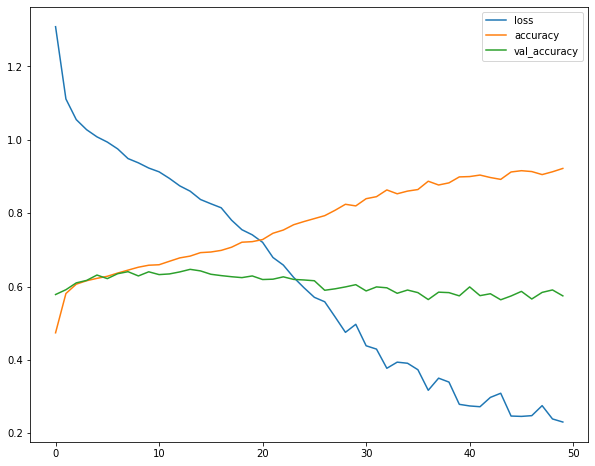

In [26]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

171/171 [==============================] - 2s 10ms/step
The accuracy of the model is 0.5754578754578754


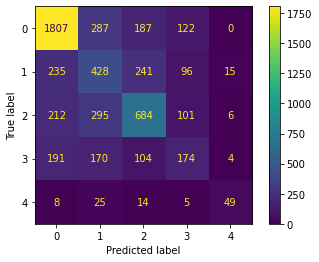

In [27]:
pred = model.predict(X_test)
pred_nohe = np.array([i.argmax() for i in pred])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.astype(np.int32), pred_nohe))
print(f'The accuracy of the model is {accuracy_score(y_test.astype(np.int32), pred_nohe )}')
disp.plot()

In [36]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('C:/Users/sanda/Documents/esp_dev_files/tensor_test_3_cnn/src/cnn_ptb_model_3.tflite', 'wb') as f:
#   f.write(tflite_model)

# model.save("/Users/sanda/Documents/esp_dev_files/ecg_project_2/ptb_models_test/cnn_ptb_model_3.h5")

INFO:tensorflow:Assets written to: C:\Users\sanda\AppData\Local\Temp\tmpdbfn50iy\assets
